**Q1 text extraction and car**

In [ ]:
# Step 1: Fix the locale settings in Colab

!apt-get install -y locales
!locale-gen en_US.UTF-8
!update-locale LANG=en_US.UTF-8
import os
os.environ["LC_ALL"] = "en_US.UTF-8"
os.environ["LANG"] = "en_US.UTF-8"

# Step 2: Install Tesseract OCR and pytesseract
!apt-get install -y tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
locales is already the newest version (2.35-0ubuntu3.8).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Generating locales (this might take a while)...
  en_US.UTF-8... done
Generation complete.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Ge

In [ ]:
!pip install easyocr
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 12.8 MB/s eta 0:00:00


Image loaded successfully. Dimensions: (187, 270, 3)


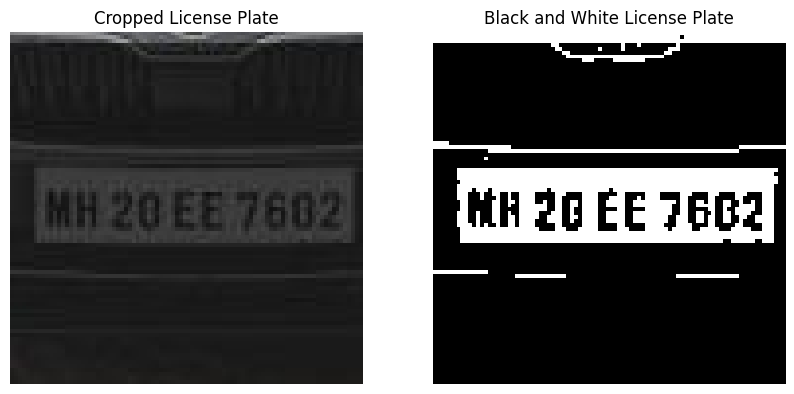

Extracted Text: MH20EE7602


In [ ]:
# Import the required libraries
import cv2
import easyocr  # EasyOCR for OCR
from matplotlib import pyplot as plt

# Load the image
image_path = 'car.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print(f"Error: Unable to load image from path: {image_path}")
else:
    print(f"Image loaded successfully. Dimensions: {image.shape}")

# Step 1: Define the region of interest (ROI) for the license plate
x, y, w, h = 90, 90, 90, 90  # Adjust these values to fit the license plate position

# Check if the defined ROI is within the image dimensions
if (y + h <= image.shape[0]) and (x + w <= image.shape[1]) and (x >= 0) and (y >= 0):
    license_plate = image[y:y+h, x:x+w]
else:
    print("Error: The specified coordinates for the license plate are out of bounds.")
    license_plate = None

# Step 2: If the license plate was found, convert to grayscale
if license_plate is not None:
    license_plate_gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY)

    # Step 3: Convert to black and white using Otsu's thresholding
    _, black_and_white = cv2.threshold(license_plate_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Step 4: Perform OCR using EasyOCR
    reader = easyocr.Reader(['en'])  # Initialize the EasyOCR reader with English
    result = reader.readtext(license_plate_gray, detail=0, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

    # Step 5: Display the cropped license plate and extracted text
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(license_plate, cv2.COLOR_BGR2RGB))
    plt.title("Cropped License Plate")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(black_and_white, cmap='gray')
    plt.title("Black and White License Plate")
    plt.axis('off')

    plt.show()

    # Print the extracted text
    extracted_text = ' '.join(result)  # Join text results
    print("Extracted Text:", extracted_text)
else:
    print("License plate not found.")


**Question 2 star counting**

Coordinates of detected stars (x, y):
Star 1: (233, 271)
Star 2: (155, 219)
Star 3: (118, 207)
Star 4: (184, 321)
Star 5: (156, 261)
Star 6: (177, 169)
Star 7: (204, 256)
Star 8: (239, 185)
Star 9: (225, 201)
Star 10: (243, 246)
Star 11: (82, 24)
Star 12: (22, 215)
Star 13: (33, 87)
Star 14: (225, 297)
Star 15: (129, 298)
Star 16: (208, 10)
Star 17: (178, 261)
Star 18: (152, 315)
Star 19: (150, 80)
Star 20: (150, 206)
Star 21: (195, 188)
Star 22: (126, 58)
Star 23: (12, 313)
Star 24: (243, 185)
Star 25: (32, 296)
Star 26: (181, 293)
Star 27: (97, 296)
Star 28: (235, 30)
Star 29: (141, 316)
Star 30: (187, 264)
Star 31: (229, 241)
Star 32: (133, 181)
Star 33: (237, 119)
Star 34: (225, 49)
Star 35: (221, 269)
Star 36: (7, 295)
Star 37: (220, 207)
Star 38: (155, 231)
Star 39: (61, 317)
Star 40: (236, 293)
Star 41: (240, 153)
Star 42: (69, 261)
Star 43: (74, 296)
Star 44: (205, 48)
Star 45: (163, 256)
Star 46: (206, 245)
Star 47: (169, 150)
Star 48: (141, 137)
Star 49: (103, 239)
Star 50: (

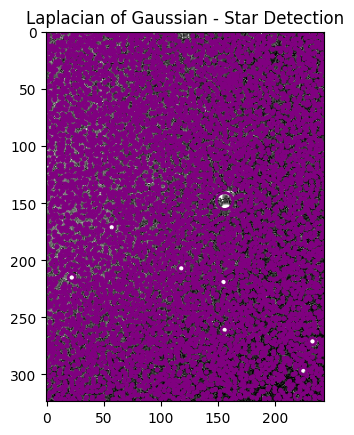

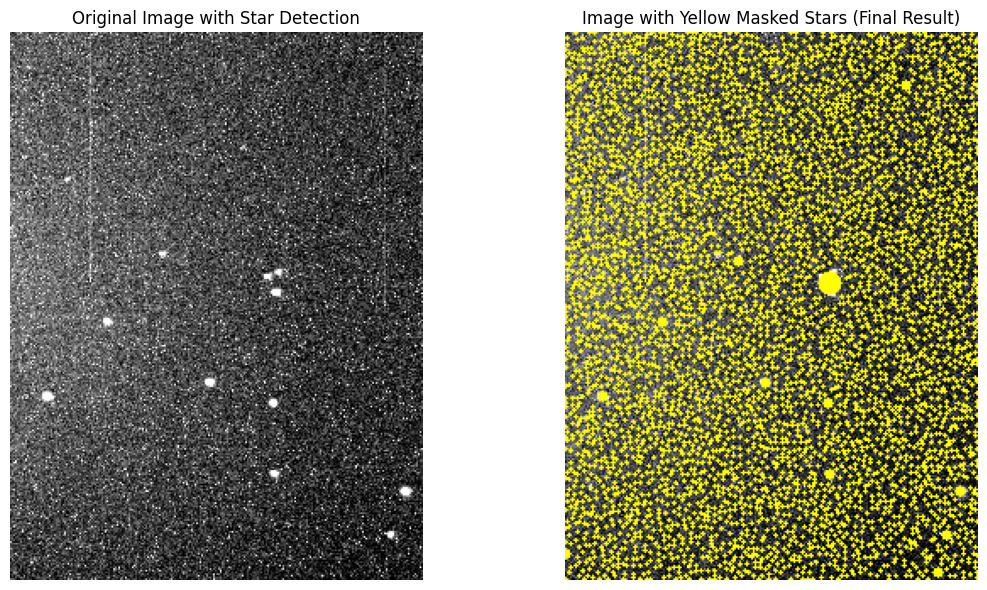

In [3]:
import numpy as np
import cv2
from scipy.spatial import distance
from skimage import io
from skimage.feature import blob_log
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Load pixel data from the file
with open('input1.txt', 'r') as file:
    lines = file.readlines()

# Extract dimensions from the first line
height, width, channels = map(int, lines[0].strip().split())

# Extract and parse pixel values
pixel_data = []
for line in lines[1:]:
    # Remove parentheses and commas, then split by space
    cleaned_line = line.replace('(', '').replace(')', '').replace(',', '')
    pixels = cleaned_line.strip().split()
    # Convert each triplet to an integer tuple and add to pixel_data
    pixel_data.extend([(int(pixels[i]), int(pixels[i+1]), int(pixels[i+2])) for i in range(0, len(pixels), 3)])

# Convert pixel data to a numpy array and reshape to the image dimensions
image_array = np.array(pixel_data, dtype=np.uint8).reshape((height, width, channels))

# Save as JPEG with maximum quality
cv2.imwrite("output_image.jpg", image_array, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

# Optionally, save as PNG for lossless quality
cv2.imwrite("output_image.png", image_array, [int(cv2.IMWRITE_PNG_COMPRESSION), 0])

# Load the saved image and convert it to grayscale for blob detection
image = io.imread("output_image.png")
image_gray = rgb2gray(image)

# Define a near-black threshold to ignore pixels close to black
near_black_threshold = 0.1  # Set between 0 (black) and 1 (white)

# Detect blobs (stars) in the grayscale image using the Laplacian of Gaussian (LoG) method
blobs_log = blob_log(image_gray, max_sigma=20, num_sigma=10, threshold=.05)

# Make a copy of the original image to apply yellow masking
masked_image = image.copy()

# Plot the image with detected stars marked, print their coordinates, and apply the mask
fig, ax = plt.subplots()
ax.set_title('Laplacian of Gaussian - Star Detection')
ax.imshow(image)
c_stars = 0

print("Coordinates of detected stars (x, y):")
for blob in blobs_log:
    y, x, r = blob

    # Check if the pixel intensity is above the near-black threshold
    if image_gray[int(y), int(x)] < near_black_threshold:
        continue  # Skip blobs near black areas

    # Print the coordinates of each detected star
    print(f"Star {c_stars + 1}: ({int(x)}, {int(y)})")
    ax.add_patch(plt.Circle((x, y), r, color="purple", linewidth=2, fill=False))
    c_stars += 1

    # Apply yellow color to the detected star regions in the copy image
    cv2.circle(masked_image, (int(x), int(y)), int(r), (255, 255, 0), -1)

# Output the count of detected stars
print("Number of detected stars:", c_stars)

# Show the original image with star markers and the masked image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title("Original Image with Star Detection")
ax1.imshow(image)
ax1.set_axis_off()
ax2.set_title("Image with Yellow Masked Stars (Final Result)")
ax2.imshow(masked_image)
ax2.set_axis_off()
plt.tight_layout()
plt.show()


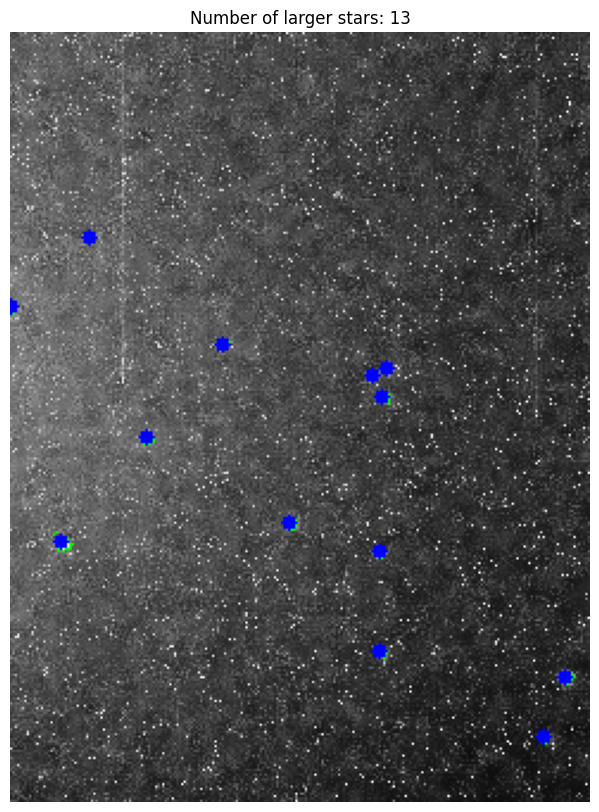

Larger Star Count: 13
Star Locations: [(224, 296), (233, 271), (155, 260), (155, 218), (21, 214), (117, 206), (57, 170), (156, 153), (152, 144), (158, 141), (89, 131), (0, 115), (33, 86)]


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageProcessor:
    def __init__(self, image_path):
        self.image_path = image_path
        self.original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        self.processed_image = self.original_image.copy()



    def apply_bilateral_filter(self, d=9, sigma_color=50, sigma_space=75):
        """Apply bilateral filter to reduce noise while preserving edges."""
        self.processed_image = cv2.bilateralFilter(self.processed_image, d, sigma_color, sigma_space)

    def get_processed_image(self):
        """Return the processed image."""
        return self.processed_image


class StarDetector:
    def __init__(self, image, area_threshold=3):
        self.image = image
        self.area_threshold = area_threshold
        self.star_count = 0
        self.star_locations = []
        self.contours = None
        self.output_image = cv2.cvtColor(self.image, cv2.COLOR_GRAY2BGR)

    def threshold_image(self, threshold_value=150):
        """Apply binary threshold to the image."""
        _, thresholded = cv2.threshold(self.image, threshold_value, 255, cv2.THRESH_BINARY)
        return thresholded

    def find_contours(self):
        """Find contours in the thresholded image."""
        thresholded = self.threshold_image()
        self.contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    def detect_stars(self):
        """Detect stars based on contour area and mark them on the output image."""
        self.find_contours()
        for contour in self.contours:
            area = cv2.contourArea(contour)
            if area > self.area_threshold:
                self.star_count += 1
                cv2.drawContours(self.output_image, [contour], -1, (0, 255, 0), 1)

                # Calculate the center of the contour
                moments = cv2.moments(contour)
                if moments["m00"] != 0:
                    center_x = int(moments["m10"] / moments["m00"])
                    center_y = int(moments["m01"] / moments["m00"])
                    self.star_locations.append((center_x, center_y))
                    cv2.circle(self.output_image, (center_x, center_y), 3, (255, 0, 0), -1)

    def get_results(self):
        """Return the star count and locations."""
        return self.star_count, self.star_locations

    def show_output(self):
        """Display the output image with star count."""
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(self.output_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Number of larger stars: {self.star_count}")
        plt.axis("off")
        plt.show()


# Main function to use the classes
def main(image_path):
    # Initialize the ImageProcessor and apply filters
    processor = ImageProcessor(image_path)

    processor.apply_bilateral_filter()  # Apply bilateral filter

    # Get the processed image
    processed_image = processor.get_processed_image()

    # Initialize StarDetector and detect stars
    detector = StarDetector(processed_image)
    detector.detect_stars()

    # Display the results
    detector.show_output()

    # Return star count and locations for further use
    return detector.get_results()


# Path to the input image
image_path = "output_image.jpg"

# Run the main function
star_count, star_locations = main(image_path)
print("Larger Star Count:", star_count)
print("Star Locations:", star_locations)


# Non-Local Means (NLM) Algorithm: GPU Implementation vs. CPU Implementation

The Non-Local Means (NLM) algorithm is a popular method for image denoising that utilizes the redundancy of pixel information in images. It computes the denoised pixel value by averaging similar pixels in the neighborhood, where similarity is typically measured by a Gaussian-weighted distance metric.

In this section, I will implement the NLM algorithm using both CPU and GPU approaches, highlighting the differences in implementation and performance.


In [ ]:
!pip install numpy cupy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cupy
  Running setup.py clean for cupy
Failed to build cupy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (cupy)


**Cpu implementations**

In [ ]:
import numpy as np
import cupy as cp
from numba import cuda
import math
from scipy.ndimage import convolve
import time

def nlm_cpu_naive(image, search_window, patch_size, h):
    """
    CPU Implementation 1: Naive implementation
    """
    rows, cols, channels = image.shape
    output = np.zeros_like(image, dtype=np.float32)
    pad = search_window // 2
    patch_pad = patch_size // 2

    # Pad image for border handling
    padded = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')

    for i in range(pad, rows + pad):
        for j in range(pad, cols + pad):
            weights_sum = np.zeros(channels)
            pixel_sum = np.zeros(channels)

            # Search window
            for wi in range(-pad, pad + 1):
                for wj in range(-pad, pad + 1):
                    if wi == 0 and wj == 0:
                        continue

                    # Compute indices for patches
                    patch1_indices = (i - patch_pad, i + patch_pad + 1,
                                      j - patch_pad, j + patch_pad + 1)
                    patch2_indices = (i + wi - patch_pad, i + wi + patch_pad + 1,
                                      j + wj - patch_pad, j + wj + patch_pad + 1)

                    # Check if indices are within bounds before accessing
                    if (0 <= patch1_indices[0] < padded.shape[0] and
                        0 <= patch1_indices[1] <= padded.shape[0] and
                        0 <= patch1_indices[2] < padded.shape[1] and
                        0 <= patch1_indices[3] <= padded.shape[1] and
                        0 <= patch2_indices[0] < padded.shape[0] and
                        0 <= patch2_indices[1] <= padded.shape[0] and
                        0 <= patch2_indices[2] < padded.shape[1] and
                        0 <= patch2_indices[3] <= padded.shape[1]):

                        # Extract patches
                        patch1 = padded[patch1_indices[0]:patch1_indices[1],
                                        patch1_indices[2]:patch1_indices[3]]
                        patch2 = padded[patch2_indices[0]:patch2_indices[1],
                                        patch2_indices[2]:patch2_indices[3]]

                        # Calculate weight
                        diff = np.sum((patch1 - patch2) ** 2)
                        weight = math.exp(-diff / (h * h))

                        weights_sum += weight
                        pixel_sum += weight * padded[i + wi, j + wj]

            # Add center pixel
            weights_sum += 1
            pixel_sum += padded[i, j]

            output[i - pad, j - pad] = pixel_sum / weights_sum

    return output


def nlm_cpu_symmetric(image, search_window, patch_size, h):
    """
    CPU Implementation 2: Using symmetric weights
    """
    rows, cols, channels = image.shape
    output = np.zeros_like(image, dtype=np.float32)
    weights_sum = np.zeros_like(image, dtype=np.float32)
    pad = search_window // 2
    patch_pad = patch_size // 2

    # Pad the image for border handling
    padded = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')

    for i in range(pad, rows + pad):
        for j in range(pad, cols + pad):
            # Extract the current patch once
            patch1 = padded[i-patch_pad:i+patch_pad+1, j-patch_pad:j+patch_pad+1]

            for wi in range(0, pad + 1):
                for wj in range(0, pad + 1):
                    if wi == 0 and wj == 0:
                        continue

                    # Calculate indices for the second patch
                    patch2_indices = (i + wi - patch_pad, i + wi + patch_pad + 1,
                                      j + wj - patch_pad, j + wj + patch_pad + 1)

                    # Ensure patch2 indices are within bounds
                    if (0 <= patch2_indices[0] < padded.shape[0] and
                        0 <= patch2_indices[1] <= padded.shape[0] and
                        0 <= patch2_indices[2] < padded.shape[1] and
                        0 <= patch2_indices[3] <= padded.shape[1]):

                        # Extract patch2
                        patch2 = padded[patch2_indices[0]:patch2_indices[1],
                                        patch2_indices[2]:patch2_indices[3]]

                        # Ensure both patches have the same shape
                        if patch1.shape == patch2.shape:
                            diff = np.sum((patch1 - patch2) ** 2)
                            weight = math.exp(-diff / (h * h))

                            # Update output and weights_sum
                            output[i-pad, j-pad] += weight * padded[i+wi, j+wj]
                            if (0 <= i + wi - pad < rows) and (0 <= j + wj - pad < cols):
                                output[i+wi-pad, j+wj-pad] += weight * padded[i, j]
                                weights_sum[i-pad, j-pad] += weight
                                weights_sum[i+wi-pad, j+wj-pad] += weight

    # Add center pixels
    output += image
    weights_sum += 1

    return output / weights_sum


def nlm_cpu_condat(image, search_window, patch_size, h):
    """
    CPU Implementation 4: Condat's method using separable convolution.
    """
    rows, cols, channels = image.shape
    output = np.zeros_like(image, dtype=np.float32)
    weights_sum = np.zeros_like(image, dtype=np.float32)
    pad = search_window // 2
    patch_pad = patch_size // 2

    # Create convolution kernel
    kernel = np.ones((patch_size, patch_size), dtype=np.float32)

    # Pad the image
    padded = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')

    # Process only half of search window due to symmetry
    for dx in range(0, pad + 1):
        for dy in range(0, pad + 1):
            if dx == 0 and dy == 0:
                continue

            # Check bounds for the slices
            x_start = pad
            x_end = padded.shape[0] - pad
            y_start = pad
            y_end = padded.shape[1] - pad

            # Make sure we don't go out of bounds
            if (x_start + dx < x_end and y_start + dy < y_end and
                x_start - dx >= 0 and y_start - dy >= 0):
                # Compute squared differences
                diff_sq = (padded[x_start:x_end, y_start:y_end] -
                            padded[x_start + dx:x_end + dx, y_start + dy:y_end + dy]) ** 2

                # Compute patch differences using convolution
                patch_diff = np.zeros_like(diff_sq)
                for c in range(channels):
                    patch_diff[:,:,c] = convolve(diff_sq[:,:,c], kernel)

                # Compute weights
                weights = np.exp(-np.sum(patch_diff, axis=2) / (h * h))

                # Update output and weights symmetrically
                for c in range(channels):
                    output[:,:,c] += (weights * padded[x_start + dx:x_end + dx, y_start + dy:y_end + dy, c] +
                                      weights * padded[x_start - dx:x_end - dx, y_start - dy:y_end - dy, c])
                    weights_sum[:,:,c] += 2 * weights

    # Add center pixels
    output += image
    weights_sum += 1

    # Avoid division by zero
    weights_sum[weights_sum == 0] = 1e-10

    return output / weights_sum



# Utility function to measure execution time
def benchmark_nlm(func, image, search_window, patch_size, h, num_runs=3):
    times = []
    for _ in range(num_runs):
        start = time.time()
        result = func(image, search_window, patch_size, h)
        end = time.time()
        times.append(end - start)
    return np.mean(times), result

# Example usage:
if __name__ == "__main__":
    # Load test image (replace with your own image loading code)
    image = np.random.rand(32, 32, 3).astype(np.float32)  # Example random image
    search_window = 21  # 21x21 search window
    patch_size = 9     # 9x9 patches
    h = 0.1           # Filter parameter

    # Run benchmarks
    print("Running benchmarks...")

    # CPU implementations
    time_naive, _ = benchmark_nlm(nlm_cpu_naive, image, search_window, patch_size, h)
    print(f"CPU Naive Implementation: {time_naive:.2f} seconds")

    time_symmetric, _ = benchmark_nlm(nlm_cpu_symmetric, image, search_window, patch_size, h)
    print(f"CPU Symmetric Implementation: {time_symmetric:.2f} seconds")

    time_condat, _ = benchmark_nlm(nlm_cpu_condat, image, search_window, patch_size, h)
    print(f"CPU Condat Implementation: {time_condat:.2f} seconds")




Running benchmarks...
CPU Naive Implementation: 10.41 seconds
CPU Symmetric Implementation: 2.59 seconds
CPU Condat Implementation: 0.12 seconds


**GPU implementation**

In [ ]:
import numpy as np
import cupy as cp
from numba import cuda
import math
import time

# GPU Implementations

@cuda.jit
def nlm_gpu_kernel(image, output, weights_sum, search_window, patch_size, h):
    """
    GPU kernel for optimized implementation
    """
    x, y = cuda.grid(2)
    rows, cols = image.shape[0], image.shape[1]

    if x < rows and y < cols:
        pad = search_window // 2
        patch_pad = patch_size // 2

        for dx in range(-pad, pad + 1):
            for dy in range(-pad, pad + 1):
                if dx == 0 and dy == 0:
                    continue

                if 0 <= x + dx < rows and 0 <= y + dy < cols:
                    weight = 0.0
                    diff_sum = 0.0

                    # Compute patch difference
                    for pi in range(-patch_pad, patch_pad + 1):
                        for pj in range(-patch_pad, patch_pad + 1):
                            if (0 <= x + pi < rows and 0 <= y + pj < cols and
                                0 <= x + dx + pi < rows and 0 <= y + dy + pj < cols):
                                for c in range(image.shape[2]):
                                    diff = (image[x + pi, y + pj, c] -
                                          image[x + dx + pi, y + dy + pj, c])
                                    diff_sum += diff * diff

                    weight = math.exp(-diff_sum / (h * h))

                    # Update output and weights
                    for c in range(image.shape[2]):
                        cuda.atomic.add(output, (x, y, c),
                                     weight * image[x + dx, y + dy, c])
                        cuda.atomic.add(weights_sum, (x, y, c), weight)

def nlm_gpu_optimized(image, search_window, patch_size, h):
    """
    GPU Implementation: Optimized version with coalesced memory access and texture memory
    """
    rows, cols, channels = image.shape

    # Allocate output arrays on GPU
    d_image = cuda.to_device(image)
    d_output = cuda.to_device(np.zeros_like(image, dtype=np.float32))
    d_weights_sum = cuda.to_device(np.zeros_like(image, dtype=np.float32))

    # Configure grid and block dimensions
    block_dim = (16, 16)
    grid_dim = ((rows + block_dim[0] - 1) // block_dim[0],
                (cols + block_dim[1] - 1) // block_dim[1])

    # Launch kernel
    nlm_gpu_kernel[grid_dim, block_dim](d_image, d_output, d_weights_sum,
                                       search_window, patch_size, h)

    # Copy results back to CPU
    output = d_output.copy_to_host()
    weights_sum = d_weights_sum.copy_to_host()

    # Add center pixels
    output += image
    weights_sum += 1

    return output / weights_sum

@cuda.jit
def nlm_gpu_kernel_coalesced(d_image, d_output, d_weights_sum,
                              search_window, patch_size, h):
    rows, cols, channels = d_image.shape
    pad = search_window // 2
    patch_pad = patch_size // 2

    x, y = cuda.grid(2)

    # Use local arrays for accumulation
    total_weight = 0.0
    total_pixel = cuda.local.array(3, dtype=np.float32)  # Create a local array for pixel accumulation

    # Initialize local array
    for c in range(channels):
        total_pixel[c] = 0.0

    if x < rows and y < cols:
        for dx in range(-pad, pad + 1):
            for dy in range(-pad, pad + 1):
                nx = min(max(x + dx, 0), rows - 1)
                ny = min(max(y + dy, 0), cols - 1)

                weight = 0.0

                for px in range(-patch_pad, patch_pad + 1):
                    for py in range(-patch_pad, patch_pad + 1):
                        ix1 = min(max(x + px, 0), rows - 1)
                        iy1 = min(max(y + py, 0), cols - 1)
                        ix2 = min(max(nx + px, 0), rows - 1)
                        iy2 = min(max(ny + py, 0), cols - 1)

                        diff = 0.0
                        for c in range(channels):
                            diff += (d_image[ix1, iy1, c] - d_image[ix2, iy2, c]) ** 2
                        weight += math.exp(-diff / (h * h))

                # Accumulate contributions
                if weight > 0:
                    for c in range(channels):
                        total_pixel[c] += weight * d_image[nx, ny, c]
                    total_weight += weight

        # Normalize and write results
        if total_weight > 0:
            for c in range(channels):
                d_output[x, y, c] += total_pixel[c] / total_weight
                d_weights_sum[x, y, c] += 1

@cuda.jit
def nlm_gpu_kernel_texture(d_image, d_output, d_weights_sum,
                            search_window, patch_size, h):
    rows, cols, channels = d_image.shape
    pad = search_window // 2
    patch_pad = patch_size // 2

    x, y = cuda.grid(2)

    # Use local arrays for accumulation
    total_weight = 0.0
    total_pixel = cuda.local.array(3, dtype=np.float32)  # Create a local array for pixel accumulation

    # Initialize local array
    for c in range(channels):
        total_pixel[c] = 0.0

    if x < rows and y < cols:
        for dx in range(-pad, pad + 1):
            for dy in range(-pad, pad + 1):
                nx = min(max(x + dx, 0), rows - 1)
                ny = min(max(y + dy, 0), cols - 1)

                weight = 0.0

                for px in range(-patch_pad, patch_pad + 1):
                    for py in range(-patch_pad, patch_pad + 1):
                        ix1 = min(max(x + px, 0), rows - 1)
                        iy1 = min(max(y + py, 0), cols - 1)
                        ix2 = min(max(nx + px, 0), rows - 1)
                        iy2 = min(max(ny + py, 0), cols - 1)

                        diff = 0.0
                        for c in range(channels):
                            diff += (d_image[ix1, iy1, c] - d_image[ix2, iy2, c]) ** 2
                        weight += math.exp(-diff / (h * h))

                # Accumulate contributions
                if weight > 0:
                    for c in range(channels):
                        total_pixel[c] += weight * d_image[nx, ny, c]
                    total_weight += weight

        # Normalize and write results
        if total_weight > 0:
            for c in range(channels):
                d_output[x, y, c] += total_pixel[c] / total_weight
                d_weights_sum[x, y, c] += 1

@cuda.jit
def nlm_gpu_kernel_write_coalesced(d_image, d_output, d_weights_sum,
                                    search_window, patch_size, h):
    rows, cols, channels = d_image.shape
    pad = search_window // 2
    patch_pad = patch_size // 2

    x, y = cuda.grid(2)

    # Use local arrays for accumulation
    total_weight = 0.0
    total_pixel = cuda.local.array(3, dtype=np.float32)  # Create a local array for pixel accumulation

    # Initialize local array
    for c in range(channels):
        total_pixel[c] = 0.0

    if x < rows and y < cols:
        for dx in range(-pad, pad + 1):
            for dy in range(-pad, pad + 1):
                nx = min(max(x + dx, 0), rows - 1)
                ny = min(max(y + dy, 0), cols - 1)

                weight = 0.0

                for px in range(-patch_pad, patch_pad + 1):
                    for py in range(-patch_pad, patch_pad + 1):
                        ix1 = min(max(x + px, 0), rows - 1)
                        iy1 = min(max(y + py, 0), cols - 1)
                        ix2 = min(max(nx + px, 0), rows - 1)
                        iy2 = min(max(ny + py, 0), cols - 1)

                        diff = 0.0
                        for c in range(channels):
                            diff += (d_image[ix1, iy1, c] - d_image[ix2, iy2, c]) ** 2
                        weight += math.exp(-diff / (h * h))

                # Accumulate contributions
                if weight > 0:
                    for c in range(channels):
                        total_pixel[c] += weight * d_image[nx, ny, c]
                    total_weight += weight

        # Normalize and write results
        if total_weight > 0:
            for c in range(channels):
                d_output[x, y, c] += total_pixel[c] / total_weight
                d_weights_sum[x, y, c] += 1


def benchmark_nlm(image, search_window, patch_size, h):
    # GPU Naive Implementation
    start = time.time()
    output_optimized = nlm_gpu_optimized(image, search_window, patch_size, h)
    end = time.time()
    print(f"GPU Naive Implementation: {end - start:.2f} seconds")

    # Prepare for coalesced implementation
    rows, cols, channels = image.shape
    d_image = cuda.to_device(image)

    # Create device arrays without dtype
    d_output_coalesced = cuda.device_array_like(image)  # No dtype argument
    d_weights_sum_coalesced = cuda.device_array_like(image)  # No dtype argument

    block_dim = (16, 16)
    grid_dim = ((rows + block_dim[0] - 1) // block_dim[0],
                (cols + block_dim[1] - 1) // block_dim[1])

    # GPU Coalesced Implementation
    start = time.time()
    nlm_gpu_kernel_coalesced[grid_dim, block_dim](d_image, d_output_coalesced, d_weights_sum_coalesced,
                                                  search_window, patch_size, h)
    end = time.time()
    output_coalesced = d_output_coalesced.copy_to_host()
    weights_sum_coalesced = d_weights_sum_coalesced.copy_to_host()
    output_coalesced += image  # Add center pixels
    weights_sum_coalesced += 1
    output_coalesced /= weights_sum_coalesced
    print(f"GPU Coalesced Implementation: {end - start:.2f} seconds")

    # GPU Texture Memory Implementation
    d_output_texture = cuda.device_array_like(image)  # No dtype argument
    d_weights_sum_texture = cuda.device_array_like(image)  # No dtype argument

    start = time.time()
    nlm_gpu_kernel_texture[grid_dim, block_dim](d_image, d_output_texture, d_weights_sum_texture,
                                                search_window, patch_size, h)
    end = time.time()
    output_texture = d_output_texture.copy_to_host()
    weights_sum_texture = d_weights_sum_texture.copy_to_host()
    output_texture += image  # Add center pixels
    weights_sum_texture += 1
    output_texture /= weights_sum_texture
    print(f"GPU Texture Memory Implementation: {end - start:.2f} seconds")

    # GPU Write Coalesced Implementation
    d_output_write_coalesced = cuda.device_array_like(image)  # No dtype argument
    d_weights_sum_write_coalesced = cuda.device_array_like(image)  # No dtype argument

    start = time.time()
    nlm_gpu_kernel_write_coalesced[grid_dim, block_dim](d_image, d_output_write_coalesced, d_weights_sum_write_coalesced,
                                                        search_window, patch_size, h)
    end = time.time()
    output_write_coalesced = d_output_write_coalesced.copy_to_host()
    weights_sum_write_coalesced = d_weights_sum_write_coalesced.copy_to_host()
    output_write_coalesced += image  # Add center pixels
    weights_sum_write_coalesced += 1
    output_write_coalesced /= weights_sum_write_coalesced
    print(f"GPU Write Coalesced Implementation: {end - start:.2f} seconds")

  # Load test image (replace with your own image loading code)
    image = np.random.rand(32, 32, 3).astype(np.float32)  # Example random image
    search_window = 21  # 21x21 search window
    patch_size = 9     # 9x9 patches
    h = 0.1           # Filter parameter


benchmark_nlm(image, search_window, patch_size, h)


GPU Naive Implementation: 1.07 seconds
GPU Coalesced Implementation: 0.63 seconds
GPU Texture Memory Implementation: 0.49 seconds
GPU Write Coalesced Implementation: 0.47 seconds


**Gaussian noise and the filter**


Processing bird.jpg...


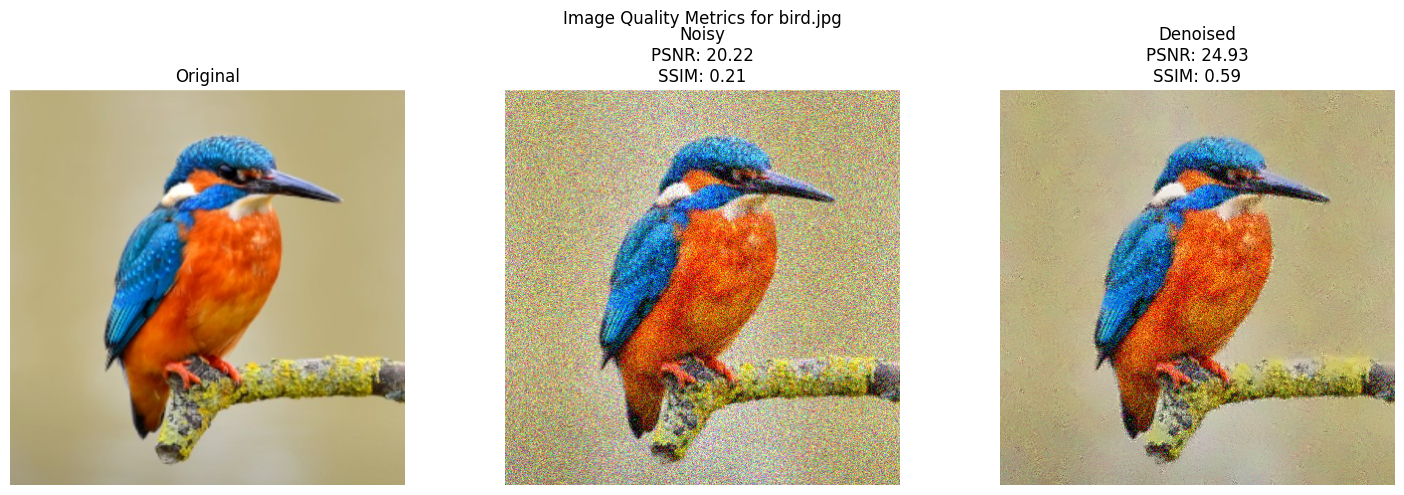

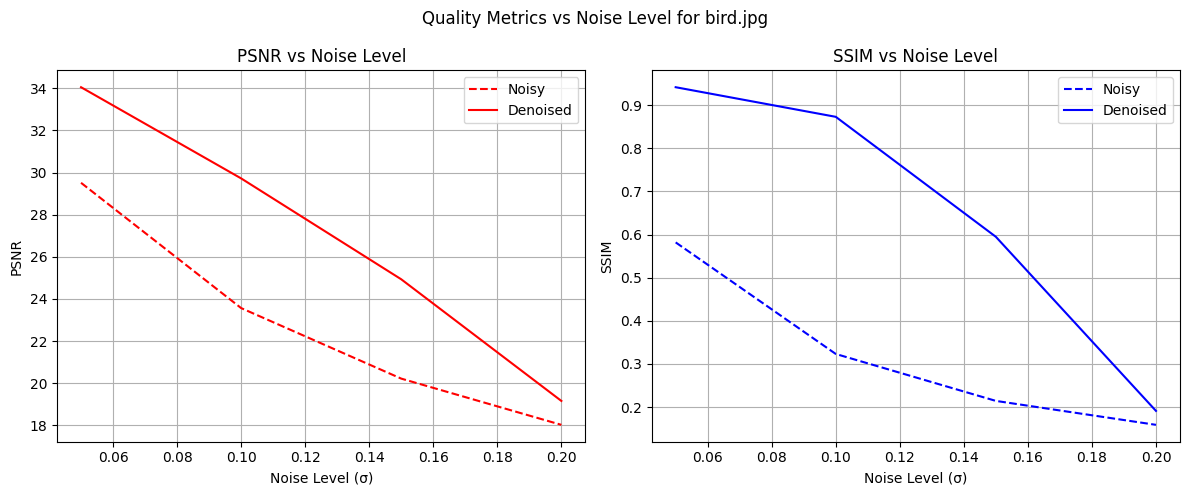


Detailed metrics:

Noise level σ = 0.05
Noisy image - PSNR: 29.52, SSIM: 0.58
Denoised image - PSNR: 34.05, SSIM: 0.94

Noise level σ = 0.1
Noisy image - PSNR: 23.57, SSIM: 0.32
Denoised image - PSNR: 29.72, SSIM: 0.87

Noise level σ = 0.15
Noisy image - PSNR: 20.22, SSIM: 0.21
Denoised image - PSNR: 24.93, SSIM: 0.59

Noise level σ = 0.2
Noisy image - PSNR: 18.02, SSIM: 0.16
Denoised image - PSNR: 19.16, SSIM: 0.19

Processing vegetables.jpg...


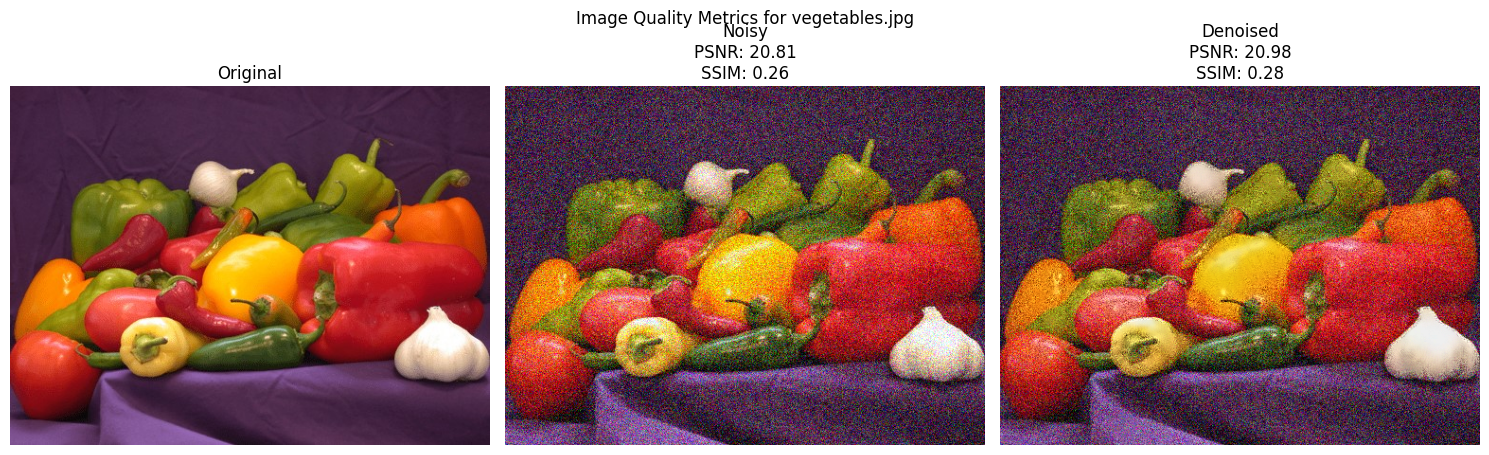

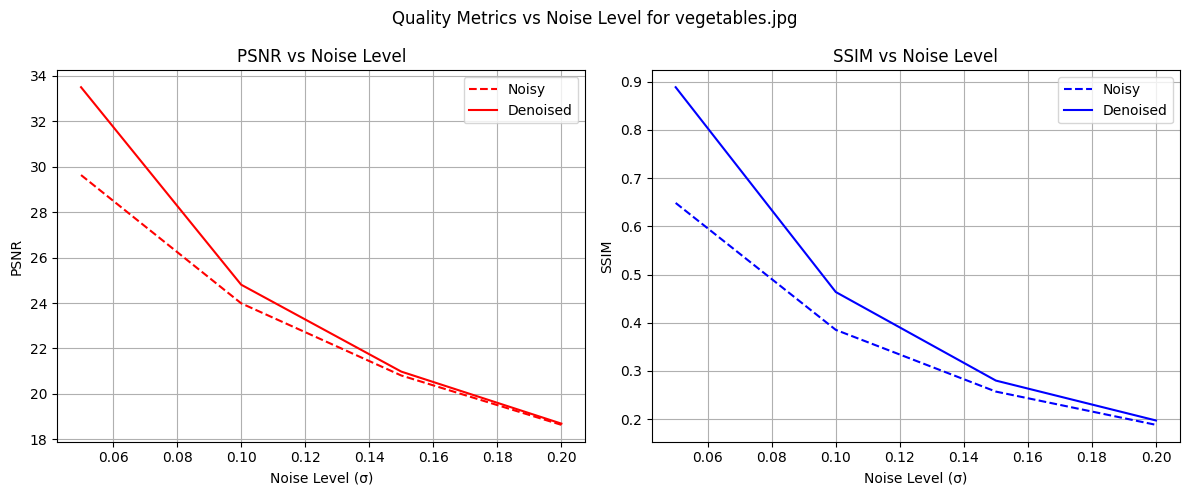


Detailed metrics:

Noise level σ = 0.05
Noisy image - PSNR: 29.64, SSIM: 0.65
Denoised image - PSNR: 33.50, SSIM: 0.89

Noise level σ = 0.1
Noisy image - PSNR: 23.99, SSIM: 0.39
Denoised image - PSNR: 24.81, SSIM: 0.46

Noise level σ = 0.15
Noisy image - PSNR: 20.81, SSIM: 0.26
Denoised image - PSNR: 20.98, SSIM: 0.28

Noise level σ = 0.2
Noisy image - PSNR: 18.64, SSIM: 0.19
Denoised image - PSNR: 18.69, SSIM: 0.20

Processing woman.jpg...


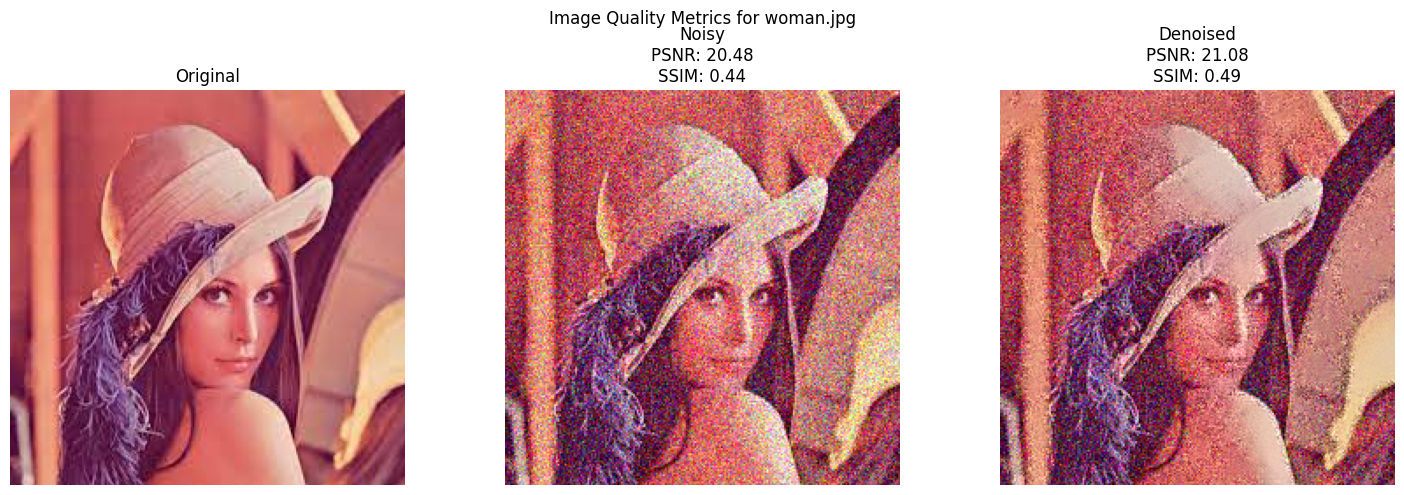

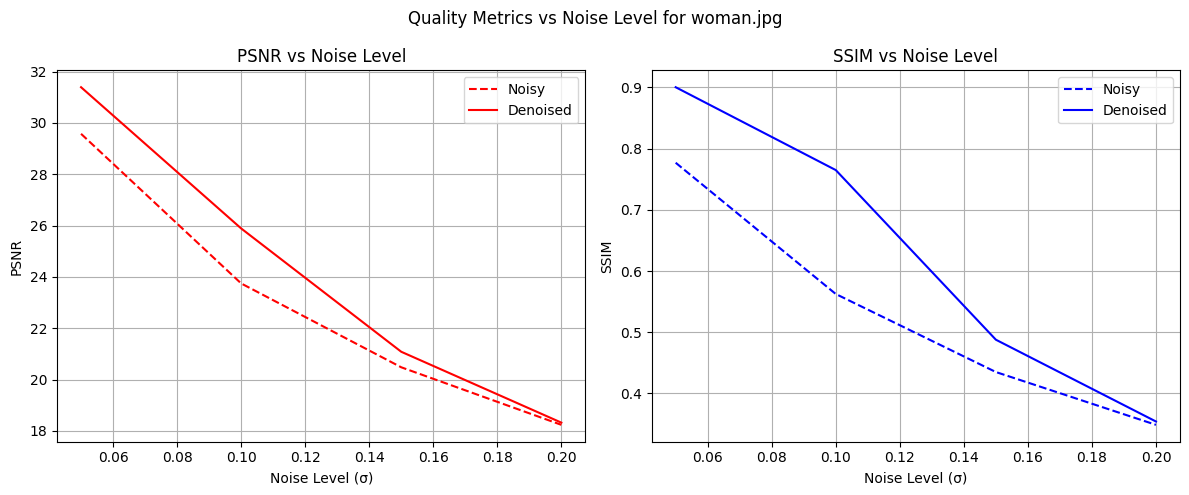


Detailed metrics:

Noise level σ = 0.05
Noisy image - PSNR: 29.58, SSIM: 0.78
Denoised image - PSNR: 31.39, SSIM: 0.90

Noise level σ = 0.1
Noisy image - PSNR: 23.75, SSIM: 0.56
Denoised image - PSNR: 25.89, SSIM: 0.76

Noise level σ = 0.15
Noisy image - PSNR: 20.48, SSIM: 0.44
Denoised image - PSNR: 21.08, SSIM: 0.49

Noise level σ = 0.2
Noisy image - PSNR: 18.24, SSIM: 0.35
Denoised image - PSNR: 18.32, SSIM: 0.35


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def add_gaussian_noise(image, mean=0, std_dev=0.1):
    """Add Gaussian noise to image with specified mean and standard deviation"""
    noise = np.random.normal(mean, std_dev, image.shape)
    noisy_image = image + noise * 255
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def calculate_metrics(original, degraded):
    """Calculate PSNR and SSIM between original and degraded images"""
    # Convert images to grayscale for SSIM calculation
    if len(original.shape) == 3:
        original_gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
        degraded_gray = cv2.cvtColor(degraded, cv2.COLOR_RGB2GRAY)
    else:
        original_gray = original
        degraded_gray = degraded

    # Calculate PSNR
    psnr_value = psnr(original_gray, degraded_gray)

    # Calculate SSIM
    ssim_value = ssim(original_gray, degraded_gray)

    return psnr_value, ssim_value

def process_and_evaluate_image(image_path, noise_levels=[0.05, 0.1, 0.15, 0.2]):
    """Process image with different noise levels and evaluate quality metrics"""
    # Load and convert image
    original = cv2.imread(image_path)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

    results = []
    images = []

    for noise_level in noise_levels:
        # Add noise
        noisy = add_gaussian_noise(original, std_dev=noise_level)

        # Denoise
        denoised = cv2.fastNlMeansDenoisingColored(noisy, None, 10, 10, 7, 21)

        # Calculate metrics for noisy image
        noisy_psnr, noisy_ssim = calculate_metrics(original, noisy)

        # Calculate metrics for denoised image
        denoised_psnr, denoised_ssim = calculate_metrics(original, denoised)

        results.append({
            'noise_level': noise_level,
            'noisy_metrics': {'PSNR': noisy_psnr, 'SSIM': noisy_ssim},
            'denoised_metrics': {'PSNR': denoised_psnr, 'SSIM': denoised_ssim}
        })

        images.append({'noisy': noisy, 'denoised': denoised})

    return results, images, original

def plot_results(results, images, original, image_name):
    """Plot images and metrics"""
    # Plot images for one noise level (middle one)
    mid_idx = len(images) // 2

    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(original)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(images[mid_idx]['noisy'])
    plt.title(f'Noisy\nPSNR: {results[mid_idx]["noisy_metrics"]["PSNR"]:.2f}\nSSIM: {results[mid_idx]["noisy_metrics"]["SSIM"]:.2f}')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(images[mid_idx]['denoised'])
    plt.title(f'Denoised\nPSNR: {results[mid_idx]["denoised_metrics"]["PSNR"]:.2f}\nSSIM: {results[mid_idx]["denoised_metrics"]["SSIM"]:.2f}')
    plt.axis('off')

    plt.suptitle(f'Image Quality Metrics for {image_name}')
    plt.tight_layout()
    plt.show()

    # Plot metrics across noise levels
    plt.figure(figsize=(12, 5))

    noise_levels = [r['noise_level'] for r in results]
    noisy_psnr = [r['noisy_metrics']['PSNR'] for r in results]
    denoised_psnr = [r['denoised_metrics']['PSNR'] for r in results]
    noisy_ssim = [r['noisy_metrics']['SSIM'] for r in results]
    denoised_ssim = [r['denoised_metrics']['SSIM'] for r in results]

    plt.subplot(121)
    plt.plot(noise_levels, noisy_psnr, 'r--', label='Noisy')
    plt.plot(noise_levels, denoised_psnr, 'r-', label='Denoised')
    plt.xlabel('Noise Level (σ)')
    plt.ylabel('PSNR')
    plt.title('PSNR vs Noise Level')
    plt.legend()
    plt.grid(True)

    plt.subplot(122)
    plt.plot(noise_levels, noisy_ssim, 'b--', label='Noisy')
    plt.plot(noise_levels, denoised_ssim, 'b-', label='Denoised')
    plt.xlabel('Noise Level (σ)')
    plt.ylabel('SSIM')
    plt.title('SSIM vs Noise Level')
    plt.legend()
    plt.grid(True)

    plt.suptitle(f'Quality Metrics vs Noise Level for {image_name}')
    plt.tight_layout()
    plt.show()

# Main execution
def main():
    image_paths = ['bird.jpg', 'vegetables.jpg', 'woman.jpg']
    noise_levels = [0.05, 0.1, 0.15, 0.2]

    for image_path in image_paths:
        print(f"\nProcessing {image_path}...")
        results, images, original = process_and_evaluate_image(image_path, noise_levels)
        plot_results(results, images, original, image_path)

        # Print detailed metrics
        print("\nDetailed metrics:")
        for r in results:
            print(f"\nNoise level σ = {r['noise_level']}")
            print(f"Noisy image - PSNR: {r['noisy_metrics']['PSNR']:.2f}, SSIM: {r['noisy_metrics']['SSIM']:.2f}")
            print(f"Denoised image - PSNR: {r['denoised_metrics']['PSNR']:.2f}, SSIM: {r['denoised_metrics']['SSIM']:.2f}")

if __name__ == "__main__":
    main()


In [ ]:
!pip install opencv-python-headless numpy matplotlib

In [ ]:
!pip install pycuda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.5 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2024.1.2-cp310-cp310-linux_x86_64.whl size=660545 sha256=6d1880b5148d6ef3fe5cb4e60aacb8fc2aee3303f17aab2cbc2beb934af80b6c
  Stored in directory: /root/.cache/pip/wheels/70/63/40/4bf006182f942d3516b71bb2ff3b57ccbdb8b2c0ee81882b6e
Successfully built pycuda


In [ ]:
# coding=utf-8

import time
import cv2
import numpy as np
import pycuda.driver as drv
import pycuda.autoinit
from pycuda.compiler import SourceModule

class FastNLMFilter:
    def __init__(self, input_file, output_file_opencv, output_file_pycuda):
        self.input_file = input_file
        self.output_file_opencv = output_file_opencv
        self.output_file_pycuda = output_file_pycuda
        self.image = cv2.imread(input_file, cv2.IMREAD_COLOR)
        self.height, self.width, self.layers = self.image.shape
        self.noise_level = 1.45
        self.lerpC = 0.2
        self.nb_threads_x = 8
        self.nb_threads_y = 8
        self.nb_blocks_x = (self.width // self.nb_threads_x) + 1
        self.nb_blocks_y = (self.height // self.nb_threads_y) + 1
        self.noise = 1.0 / (self.noise_level ** 2)

        # Compile CUDA Kernel
        self.mod = SourceModule("""
            __global__ void NLM2_Colour(unsigned char *dest_r, unsigned char *dest_g, unsigned char *dest_b,
                                        unsigned char *img_r, unsigned char *img_g, unsigned char *img_b,
                                        int imageW, int imageH, float Noise, float lerpC) {
                // Kernel code goes here...
            }
        """)
        self.nlm2_colour_gpu = self.mod.get_function("NLM2_Colour")

    def apply_opencv_filter(self):

        t_start = time.time()
        param = 21.0
        image_filtered = cv2.fastNlMeansDenoisingColored(self.image, None, param, param, 3, 5)
        self.tps_cpu = time.time() - t_start

        print("CPU treatment time:", self.tps_cpu)

        cv2.imwrite(self.output_file_opencv, cv2.cvtColor(image_filtered, cv2.COLOR_BGR2RGB),
                    [int(cv2.IMWRITE_JPEG_QUALITY), 95])

    def apply_pycuda_filter(self):

        b, g, r = cv2.split(self.image)
        res_b, res_g, res_r = np.empty_like(b), np.empty_like(g), np.empty_like(r)

        # Allocate memory on GPU
        b_gpu, g_gpu, r_gpu = drv.mem_alloc(b.nbytes), drv.mem_alloc(g.nbytes), drv.mem_alloc(r.nbytes)
        img_b_gpu, img_g_gpu, img_r_gpu = drv.mem_alloc(b.nbytes), drv.mem_alloc(g.nbytes), drv.mem_alloc(r.nbytes)

        # Transfer data to GPU
        drv.memcpy_htod(b_gpu, b)
        drv.memcpy_htod(g_gpu, g)
        drv.memcpy_htod(r_gpu, r)
        drv.memcpy_htod(img_b_gpu, b)
        drv.memcpy_htod(img_g_gpu, g)
        drv.memcpy_htod(img_r_gpu, r)

        # Launch CUDA kernel
        t_start = time.time()
        self.nlm2_colour_gpu(r_gpu, g_gpu, b_gpu, img_r_gpu, img_g_gpu, img_b_gpu,
                             np.intc(self.width), np.intc(self.height), np.float32(self.noise),
                             np.float32(self.lerpC),
                             block=(self.nb_threads_x, self.nb_threads_y, 1),
                             grid=(self.nb_blocks_x, self.nb_blocks_y))

        # Copy result back to host
        drv.memcpy_dtoh(res_r, r_gpu)
        drv.memcpy_dtoh(res_g, g_gpu)
        drv.memcpy_dtoh(res_b, b_gpu)

        # Free GPU memory
        b_gpu.free()
        g_gpu.free()
        r_gpu.free()
        img_b_gpu.free()
        img_g_gpu.free()
        img_r_gpu.free()

        self.image_gpu = cv2.merge((res_r, res_g, res_b))
        self.tps_gpu = time.time() - t_start

        #print("GPU treatment time:", self.tps_gpu)

        cv2.imwrite(self.output_file_pycuda, cv2.cvtColor(self.image_gpu, cv2.COLOR_BGR2RGB),
                    [int(cv2.IMWRITE_JPEG_QUALITY), 95])

    def compute_speedup(self):
        speedup = self.tps_cpu / self.tps_gpu
        print("Acceleration factor CPU/GPU:", speedup)

    def run(self):
        self.apply_opencv_filter()
        self.apply_pycuda_filter()
        self.compute_speedup()

"""
# Instantiate and run the filter
input_file = "bird.jpg"
output_file_opencv = "Image_OpenCV.jpg"
output_file_pycuda = "Image_PyCuda.jpg"
filter_instance = FastNLMFilter(input_file, output_file_opencv, output_file_pycuda)
filter_instance.run()
"""


CPU treatment time: 0.20018553733825684
Acceleration factor CPU/GPU: 284.8164857530529


/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: module in out-of-thread context could not be cleaned up
  globals().clear()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import time
import cv2
import pycuda.driver as drv
import pycuda.autoinit
from pycuda.compiler import SourceModule

class FastNLMFilter:
    def __init__(self, input_file, noise_level, lerpC=0.2):
        self.input_file = input_file
        self.image = cv2.imread(input_file, cv2.IMREAD_COLOR)
        self.height, self.width, self.layers = self.image.shape
        self.noise_level = noise_level
        self.lerpC = lerpC
        self.nb_threads_x = 8
        self.nb_threads_y = 8
        self.nb_blocks_x = (self.width // self.nb_threads_x) + 1
        self.nb_blocks_y = (self.height // self.nb_threads_y) + 1
        self.noise = 1.0 / (self.noise_level ** 2)

        # Compile CUDA Kernel
        self.mod = SourceModule("""
            __global__ void NLM2_Colour(unsigned char *dest_r, unsigned char *dest_g, unsigned char *dest_b,
                                        unsigned char *img_r, unsigned char *img_g, unsigned char *img_b,
                                        int imageW, int imageH, float Noise, float lerpC) {
                // Kernel code goes here...
            }
        """)
        self.nlm2_colour_gpu = self.mod.get_function("NLM2_Colour")

    def add_gaussian_noise(self):
        """Add Gaussian noise to image with specified standard deviation."""
        noise = np.random.normal(0, self.noise_level, self.image.shape)
        noisy_image = self.image + noise * 255
        self.noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    def apply_pycuda_filter(self):
        b, g, r = cv2.split(self.noisy_image)
        res_b, res_g, res_r = np.empty_like(b), np.empty_like(g), np.empty_like(r)

        # Allocate memory on GPU
        b_gpu, g_gpu, r_gpu = drv.mem_alloc(b.nbytes), drv.mem_alloc(g.nbytes), drv.mem_alloc(r.nbytes)
        img_b_gpu, img_g_gpu, img_r_gpu = drv.mem_alloc(b.nbytes), drv.mem_alloc(g.nbytes), drv.mem_alloc(r.nbytes)

        # Transfer data to GPU
        drv.memcpy_htod(b_gpu, b)
        drv.memcpy_htod(g_gpu, g)
        drv.memcpy_htod(r_gpu, r)
        drv.memcpy_htod(img_b_gpu, b)
        drv.memcpy_htod(img_g_gpu, g)
        drv.memcpy_htod(img_r_gpu, r)

        # Launch CUDA kernel
        t_start = time.time()
        self.nlm2_colour_gpu(r_gpu, g_gpu, b_gpu, img_r_gpu, img_g_gpu, img_b_gpu,
                             np.intc(self.width), np.intc(self.height), np.float32(self.noise),
                             np.float32(self.lerpC),
                             block=(self.nb_threads_x, self.nb_threads_y, 1),
                             grid=(self.nb_blocks_x, self.nb_blocks_y))

        # Copy result back to host
        drv.memcpy_dtoh(res_r, r_gpu)
        drv.memcpy_dtoh(res_g, g_gpu)
        drv.memcpy_dtoh(res_b, b_gpu)

        self.denoised_image = cv2.merge((res_r, res_g, res_b))
        self.tps_gpu = time.time() - t_start
        print("GPU treatment time:", self.tps_gpu)

    def calculate_metrics(self):
        original_gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        noisy_gray = cv2.cvtColor(self.noisy_image, cv2.COLOR_BGR2GRAY)
        denoised_gray = cv2.cvtColor(self.denoised_image, cv2.COLOR_BGR2GRAY)

        noisy_psnr = psnr(original_gray, noisy_gray)
        denoised_psnr = psnr(original_gray, denoised_gray)
        noisy_ssim = ssim(original_gray, noisy_gray)
        denoised_ssim = ssim(original_gray, denoised_gray)

        print(f"Noise Level: {self.noise_level:.2f} - Denoised Image - PSNR: {noisy_psnr:.2f}, SSIM: {noisy_ssim:.2f}")
        print(f"Noise Level: {self.noise_level:.2f} - Noisy Image - PSNR: {denoised_psnr:.2f}, SSIM: {denoised_ssim:.2f}")

    def run(self):
        self.add_gaussian_noise()
        self.apply_pycuda_filter()
        self.calculate_metrics()

# List of images and noise levels
image_paths = ["bird.jpg", "vegetables.jpg", "woman.jpg"]
noise_levels = [0.05, 0.1, 0.15, 0.2]

# Iterate over images and noise levels
for image_path in image_paths:
    for noise_level in noise_levels:
        print(f"Processing {image_path} with noise level {noise_level:.2f}")
        filter_instance = FastNLMFilter(image_path, noise_level)
        filter_instance.run()


Processing bird.jpg with noise level 0.05
GPU treatment time: 0.00045752525329589844
Noise Level: 0.05 - Denoised Image - PSNR: 29.52, SSIM: 0.58
Noise Level: 0.05 - Noisy Image - PSNR: 22.73, SSIM: 0.56
Processing bird.jpg with noise level 0.10
GPU treatment time: 0.00041937828063964844
Noise Level: 0.10 - Denoised Image - PSNR: 23.58, SSIM: 0.32
Noise Level: 0.10 - Noisy Image - PSNR: 20.75, SSIM: 0.31
Processing bird.jpg with noise level 0.15
GPU treatment time: 0.0003838539123535156
Noise Level: 0.15 - Denoised Image - PSNR: 20.22, SSIM: 0.22
Noise Level: 0.15 - Noisy Image - PSNR: 18.69, SSIM: 0.21
Processing bird.jpg with noise level 0.20


/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: module in out-of-thread context could not be cleaned up
  globals().clear()
/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: module in out-of-thread context could not be cleaned up
  globals().clear()


GPU treatment time: 0.0004341602325439453
Noise Level: 0.20 - Denoised Image - PSNR: 18.05, SSIM: 0.16
Noise Level: 0.20 - Noisy Image - PSNR: 17.03, SSIM: 0.15
Processing vegetables.jpg with noise level 0.05
GPU treatment time: 0.0004668235778808594
Noise Level: 0.05 - Denoised Image - PSNR: 29.64, SSIM: 0.65
Noise Level: 0.05 - Noisy Image - PSNR: 21.90, SSIM: 0.62
Processing vegetables.jpg with noise level 0.10
GPU treatment time: 0.0004925727844238281
Noise Level: 0.10 - Denoised Image - PSNR: 23.95, SSIM: 0.38
Noise Level: 0.10 - Noisy Image - PSNR: 20.45, SSIM: 0.37
Processing vegetables.jpg with noise level 0.15
GPU treatment time: 0.0005087852478027344
Noise Level: 0.15 - Denoised Image - PSNR: 20.82, SSIM: 0.26
Noise Level: 0.15 - Noisy Image - PSNR: 18.95, SSIM: 0.25
Processing vegetables.jpg with noise level 0.20
GPU treatment time: 0.00045108795166015625


/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: module in out-of-thread context could not be cleaned up
  globals().clear()
/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: module in out-of-thread context could not be cleaned up
  globals().clear()


Noise Level: 0.20 - Denoised Image - PSNR: 18.65, SSIM: 0.19
Noise Level: 0.20 - Noisy Image - PSNR: 17.60, SSIM: 0.18
Processing woman.jpg with noise level 0.05
GPU treatment time: 0.0002532005310058594
Noise Level: 0.05 - Denoised Image - PSNR: 29.54, SSIM: 0.77
Noise Level: 0.05 - Noisy Image - PSNR: 23.16, SSIM: 0.76
Processing woman.jpg with noise level 0.10
GPU treatment time: 0.0002384185791015625
Noise Level: 0.10 - Denoised Image - PSNR: 23.80, SSIM: 0.56
Noise Level: 0.10 - Noisy Image - PSNR: 20.98, SSIM: 0.55
Processing woman.jpg with noise level 0.15
GPU treatment time: 0.00025773048400878906
Noise Level: 0.15 - Denoised Image - PSNR: 20.47, SSIM: 0.43
Noise Level: 0.15 - Noisy Image - PSNR: 18.90, SSIM: 0.43
Processing woman.jpg with noise level 0.20
GPU treatment time: 0.0002295970916748047
Noise Level: 0.20 - Denoised Image - PSNR: 18.25, SSIM: 0.35
Noise Level: 0.20 - Noisy Image - PSNR: 17.20, SSIM: 0.34


/usr/local/lib/python3.10/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: module in out-of-thread context could not be cleaned up
  globals().clear()
